In [86]:
# Gerar imagens em preto e branco de um triângulo equilátero preenchido
# e do Triângulo de Sierpiński com alta resolução (2187 x 2187 = 3^7)

from PIL import Image, ImageDraw
import numpy as np

def draw_filled_equilateral_triangle(draw, size):
    """Desenha um triângulo equilátero preenchido em imagem PIL."""
    height = size * np.sqrt(3) / 2
    points = [
        (size // 2, 0),                   # topo
        (0, int(height)),                 # canto inferior esquerdo
        (size, int(height)),             # canto inferior direito
    ]
    draw.polygon(points, fill=0)

def draw_sierpinski(draw, p1, p2, p3, depth):
    """Desenha recursivamente o triângulo de Sierpiński."""
    if depth == 0:
        draw.polygon([p1, p2, p3], fill=0)
    else:
        # pontos médios
        m12 = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
        m23 = ((p2[0]+p3[0])/2, (p2[1]+p3[1])/2)
        m31 = ((p3[0]+p1[0])/2, (p3[1]+p1[1])/2)
        draw_sierpinski(draw, p1, m12, m31, depth-1)
        draw_sierpinski(draw, m12, p2, m23, depth-1)
        draw_sierpinski(draw, m31, m23, p3, depth-1)

# Tamanho da imagem
size = 2187
height = int(size * np.sqrt(3) / 2)

# Triângulo equilátero
img_tri = Image.new("1", (size, height), 1)
draw_tri = ImageDraw.Draw(img_tri)
draw_filled_equilateral_triangle(draw_tri, size)
# img_tri.save("/mnt/data/triangulo_equilatero_bw.png")

# Triângulo de Sierpiński
img_sier = Image.new("1", (size, height), 1)
draw_sier = ImageDraw.Draw(img_sier)
p1 = (size // 2, 0)
p2 = (0, height)
p3 = (size, height)
draw_sierpinski(draw_sier, p1, p2, p3, depth=10)
# img_sier.save("/mnt/data/triangulo_sierpinski_bw.png")

# "/mnt/data/triangulo_equilatero_bw.png", "/mnt/data/triangulo_sierpinski_bw.png"


In [87]:
img_tri.show()

In [23]:
from PIL import Image, ImageOps,ImageDraw
def completar_quadrado(imagem,fill):
    largura, altura = imagem.size
    lado = max(largura, altura)
    delta_larg = lado - largura
    delta_alt = lado - altura
    padding = (delta_larg // 2, delta_alt // 2, delta_larg - delta_larg // 2, delta_alt - delta_alt // 2)
    return ImageOps.expand(imagem, padding, fill=fill)

def preencher_caixas_ativas(imagem, tamanho_caixa, limiar=128, modo='preto', cor=(255, 0, 0, 128)):
    """
    Preenche as caixas que contêm estrutura com uma cor sólida (ou semitransparente).

    Parâmetros:
        imagem: PIL.Image em tons de cinza ou RGB
        tamanho_caixa: lado da caixa (em pixels)
        limiar: valor de corte para binarização
        modo: 'preto' (pixels < limiar) ou 'branco' (pixels > limiar)
        cor: tupla RGBA (ex: vermelho semitransparente = (255, 0, 0, 128))

    Retorna:
        imagem com sobreposição das caixas preenchidas
    """
    img_gray = imagem.convert('L')
    if modo == 'preto':
        imagem = completar_quadrado(img_gray,255)
        matriz = np.array(imagem)
        binaria = np.where(matriz < limiar, 1, 0)
    else:
        imagem = completar_quadrado(img_gray,0)
        matriz = np.array(imagem)
        binaria = np.where(matriz > limiar, 1, 0)

    largura, altura = imagem.size
    img_rgb = imagem.convert('RGBA')
    overlay = Image.new('RGBA', img_rgb.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(overlay)

    n_cheias = 0
    total = 0

    for x in range(0, largura - tamanho_caixa + 1, tamanho_caixa):
        for y in range(0, altura - tamanho_caixa + 1, tamanho_caixa):
            bloco = binaria[y:y+tamanho_caixa, x:x+tamanho_caixa]
            total += 1
            if np.any(bloco):
                n_cheias += 1
                draw.rectangle(
                    [x, y, x + tamanho_caixa - 1, y + tamanho_caixa - 1],
                    fill=cor
                )

    imagem_com_caixas = Image.alpha_composite(img_rgb, overlay)
    return imagem_com_caixas.convert('RGB'), n_cheias,total

In [8]:
img_sier.show()

In [27]:
img_sier.size

(2187, 1893)

In [114]:
x = []
y = []
subdivs = np.geomspace(3**1,3**7,10)
for i in subdivs:
    print(i)
    _,bb,cc = preencher_caixas_ativas(img_sier,int(2187/i),200)
    x.append(bb)
    y.append(cc)

3.0
6.240251469155711
12.980246132766672
26.99999999999999
56.162263222401386
116.82221519490007
242.99999999999997
505.4603690016126
1051.3999367541003
2187.0


In [116]:
xt = []
yt = []
# subdivs = [3,3**2,3**3,3**4,3**5,3**6,3**7]
subdivs = np.geomspace(3**1,3**7,10)
for i in subdivs:
    print(i)
    _,bb,cc = preencher_caixas_ativas(img_tri,int(2187/i),200)
    xt.append(bb)
    yt.append(cc)

3.0
6.240251469155711
12.980246132766672
26.99999999999999
56.162263222401386
116.82221519490007
242.99999999999997
505.4603690016126
1051.3999367541003
2187.0


In [115]:

log_inv_eps = np.log(subdivs) 
log_N = np.log(x)
coef, _ = np.polyfit(log_inv_eps, log_N, 1)
coef


np.float64(1.5730775823914513)

In [117]:

log_inv_eps = np.log(subdivs) 
log_Nt = np.log(xt)
coeft, _ = np.polyfit(log_inv_eps, log_Nt, 1)
coeft


np.float64(1.9244928742106682)

In [124]:
it,bb,cc = preencher_caixas_ativas(img_tri,27,200)
isi,bb,cc = preencher_caixas_ativas(img_sier,27,200)

In [126]:
isi.show()

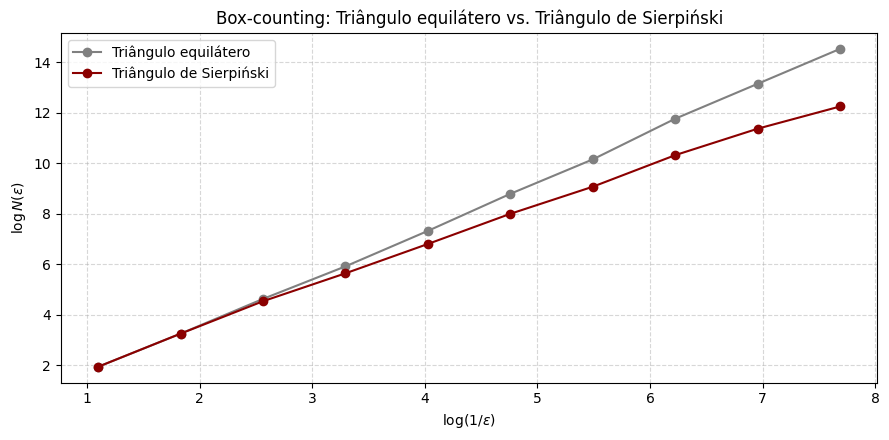

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 4.5))
plt.plot(log_inv_eps, log_Nt, 'o-', label=f"Triângulo equilátero", color='gray')
plt.plot(log_inv_eps, log_N, 'o-', label=f"Triângulo de Sierpiński", color='darkred')
plt.xlabel(r"$\log(1/\varepsilon)$")
plt.ylabel(r"$\log N(\varepsilon)$")
plt.title("Box-counting: Triângulo equilátero vs. Triângulo de Sierpiński")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("comparativo_boxcounting_triangulos.png", dpi=300)

In [146]:
width1, height1 = isi.size
width2, height2 = it.size
combined = Image.new("RGB", (width1 + 50+ width2, height1), (255, 255, 255))
combined.paste(it, (0, 0))
combined.paste(isi, (width1 + 50, 0))


In [148]:
combined.save("comparacao_triangulos_rgb.png")